In [1]:
# This line allows plotting directly in the notebook
%matplotlib inline

# Python scientific package
import numpy as np

from nilearn.datasets import fetch_abide_pcp

In [2]:
# We specify the site and number of subjects we want to download
abide = fetch_abide_pcp(derivatives=['func_preproc'],
                        SITE_ID=['NYU'],
                        n_subjects=3)


Dataset created in /Users/htamvada/nilearn_data/ABIDE_pcp



Downloaded 449443 of 449443 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)
/Users/htamvada/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Downloaded 107440893 of 107440893 bytes (100.0%,    0.0s remaining) ...done. (13 seconds, 0 min)


Downloaded 96773241 of 96773241 bytes (100.0%,    0.0s remaining) ...done. (10 seconds, 0 min)


Downloaded 103892284 of 103892284 bytes (100.0%,    0.0s remaining) ...done. (15 seconds, 0 min)


In [3]:
# We look at the available data in this dataset
print(abide.keys())

dict_keys(['description', 'phenotypic', 'func_preproc'])


In [5]:
print(abide.description)

b'ABIDE\r\n\r\n\r\nNotes\r\n-----\r\nThe Autism Brain Imaging Data Exchange (ABIDE) dataset provides previously\r\ncollected resting state functional magnetic resonance imaging datasets\r\nfrom 539 individuals with ASD and 573 typical controls for the purpose\r\nof data sharing in the broader scientific community. This grass-root\r\ninitiative involved 16 international sites, sharing 20 samples yielding\r\n1112 datasets composed of both MRI data and an extensive array of\r\nphenotypic information common across nearly all sites (see below).\r\n\r\nNote that this is the preprocessed version of ABIDE provided by the\r\npreprocess connectome projects (PCP).\r\n\r\n\r\nContent\r\n-------\r\n    :\'phenotypic\': Behavioral information.\r\n\r\n\r\nReferences\r\n----------\r\n\r\nFor more information about this dataset\'s structure:\r\nhttp://preprocessed-connectomes-project.github.io\r\nhttp://www.childmind.org/en/healthy-brain-network/abide/\r\n\r\nNielsen, Jared A., et al. "Multisite functi

In [6]:
# To get the functional dataset, we have to retrieve the variable 'func_preproc'
func = abide.func_preproc

In [7]:
# We can also look at where the data is loaded
print(func[1])

/Users/htamvada/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/NYU_0050954_func_preproc.nii.gz


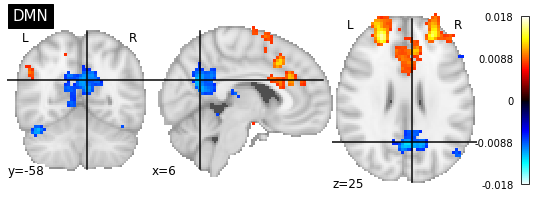

In [8]:
from nilearn import decomposition

# CanICA is nilearn's approach of group ICA. It directly embeds a masker.
canica = decomposition.CanICA(n_components=20, mask_strategy='background')
canica.fit(func)
# Retrieve the components
components = canica.components_

# Use CanICA's masker to project the components back into 3D space
components_img = canica.masker_.inverse_transform(components)

# We visualize the generated atlas
from nilearn import plotting, image

plotting.plot_stat_map(image.index_img(components_img, 9), title='DMN')
plotting.show()